In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from matplotlib.image import imread
import torch

In [53]:
# 定义保存图片函数
# image:要保存的图片名字
# addr；图片地址与相片名字的前部分
# num: 相片，名字的后缀。int 类型

In [24]:
'''
def save_image(image,addr,num):
  address = addr + str(num)+ '.jpg'
  cv2.imwrite(address,image)

videoCapture = cv2.VideoCapture("/home/ubuntu/SurgTracking/SurgT_benchmarking/data/train/case_3/1/video.mp4")
success, frame = videoCapture.read()
i = 0
#设置固定帧率
timeF = 10
j=0
while success :
  i = i + 1
  if (i % timeF == 0):
    j = j + 1
    
    save_image(frame,'/home/ubuntu/SurgTracking/image/',j)
    print('save image:',i)
  success, frame = videoCapture.read()
'''

In [2]:
img=cv2.imread("/home/ubuntu/SurgTracking/image/1.jpg")

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
img.shape

(2048, 1280, 3)

In [5]:
shaped_img=img[1024:2048,:,]

In [6]:
print(shaped_img.shape)

(1024, 1280, 3)


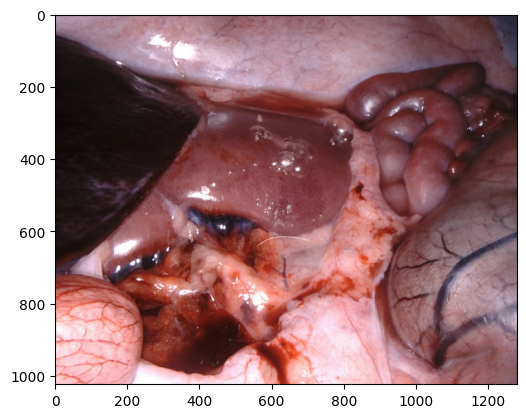

In [7]:
plt.imshow(shaped_img)#显示图片
plt.show()

In [8]:
dst = cv2.resize(shaped_img,(255,255),dst=None,fx=None,fy=None,interpolation=None)

In [9]:
lst = cv2.resize(dst,(1280,1024),dst=None,fx=None,fy=None,interpolation=None)

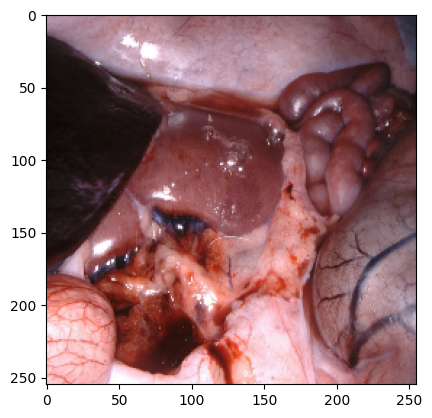

In [10]:
plt.imshow(dst)#显示图片
plt.show()

In [11]:
left=75
top=75
weight=127
height=127
y=top+height/2
x=left+weight/2
coodinate=[y,x,height,weight]

In [39]:
center=[y,x,height,weight]
x_img=dst[75:75+127,75:75+127,]
#z_img=img[400:527,400:527,]

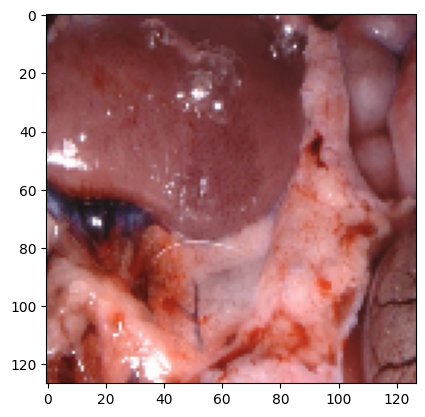

In [40]:
plt.imshow(x_img)#显示图片
plt.show()

In [41]:
from __future__ import absolute_import

import torch.nn as nn


__all__ = ['AlexNetV1', 'AlexNetV2', 'AlexNetV3']


class _BatchNorm2d(nn.BatchNorm2d):

    def __init__(self, num_features, *args, **kwargs):
        super(_BatchNorm2d, self).__init__(
            num_features, *args, eps=1e-6, momentum=0.05, **kwargs)


class _AlexNet(nn.Module):
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        return x


class AlexNetV1(_AlexNet):
    output_stride = 8

    def __init__(self):
        super(AlexNetV1, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 96, 11, 2),#inchannel,outchannel,keanal_size,stride,padding
            _BatchNorm2d(96),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2))
        self.conv2 = nn.Sequential(
            nn.Conv2d(96, 256, 5, 1, groups=2),
            _BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2))
        self.conv3 = nn.Sequential(
            nn.Conv2d(256, 384, 3, 1),
            _BatchNorm2d(384),
            nn.ReLU(inplace=True))
        self.conv4 = nn.Sequential(
            nn.Conv2d(384, 384, 3, 1, groups=2),
            _BatchNorm2d(384),
            nn.ReLU(inplace=True))
        self.conv5 = nn.Sequential(
            nn.Conv2d(384, 256, 3, 1, groups=2))


In [42]:
transf = transforms.ToTensor()
z_tensor = transf(x_img)
z_tensor.size()

torch.Size([3, 127, 127])

In [43]:
z_tensor=z_tensor.unsqueeze(0)

In [44]:
z_tensor.shape

torch.Size([1, 3, 127, 127])

In [65]:
alexnetv1 = AlexNetV1()
output_z = alexnetv1(z_tensor)

In [66]:
output_z.size()

torch.Size([1, 256, 6, 6])

In [67]:
x_tensor=transf(dst)
x_tensor.size()

torch.Size([3, 255, 255])

In [68]:
x_tensor=x_tensor.unsqueeze(0)

In [69]:
x_tensor.size()

torch.Size([1, 3, 255, 255])

In [70]:
output_x=alexnetv1(x_tensor)

In [71]:
output_x.size()

torch.Size([1, 256, 22, 22])

In [72]:
output_z

tensor([[[[ 0.0937, -0.1781, -0.0130,  0.0277, -0.0144,  0.6229],
          [-0.3736, -0.1416, -0.3959, -0.1941,  0.3465,  0.6753],
          [ 0.2084, -0.0012,  0.3210,  0.2471,  0.0193,  0.4894],
          [ 0.5713,  0.4075,  0.2906,  0.4973, -0.0768,  0.0317],
          [ 0.2796,  0.3319,  0.3705,  0.4995,  0.0721,  0.0356],
          [-0.0594, -0.0062, -0.1154,  0.1895,  0.1568,  0.1168]],

         [[ 0.3703,  0.1520,  0.3008,  0.1081, -0.2462, -0.0529],
          [-0.0591, -0.0865,  0.2146,  0.1339,  0.2477,  0.4422],
          [ 0.1429,  0.0209,  0.0700,  0.0777, -0.4343, -0.1455],
          [-0.4834,  0.1746,  0.4349, -0.1586, -0.4598, -0.2835],
          [-0.0221,  0.1582,  0.0700,  0.0037, -0.0516,  0.2008],
          [-0.0597,  0.3452,  0.5327, -0.0168,  0.1593,  0.3556]],

         [[ 0.3507,  0.1310, -0.3294, -0.2837, -0.3163, -0.1339],
          [ 0.8221,  0.6722,  0.5544,  0.1286,  0.0348, -0.2002],
          [-0.0557, -0.0919,  0.2690,  0.4390,  0.2618, -0.2606],
      

In [73]:
F=torch.nn.functional
class SiamFC(nn.Module):

    def __init__(self, out_scale=0.001):
        super(SiamFC, self).__init__()
        self.out_scale = out_scale
    
    def forward(self, z, x):
        return self._fast_xcorr(z, x) * self.out_scale
    
    def _fast_xcorr(self, z, x):
        # fast cross correlation
        nz = z.size(0)
        nx, c, h, w = x.size()
        x = x.view(-1, nz * c, h, w)  
        out = F.conv2d(x, z, groups=nz)  # shape:[nx/nz, nz, H, W]
        out = out.view(nx, -1, out.size(-2), out.size(-1)) #[nx, 1, H, W]
        return out

In [74]:
siamfc = SiamFC()
output = siamfc(output_z,output_x)

In [75]:
output

tensor([[[[0.4094, 0.3951, 0.3907, 0.3673, 0.3598, 0.3667, 0.3669, 0.3674,
           0.3717, 0.3783, 0.3825, 0.3838, 0.3939, 0.3933, 0.3953, 0.3998,
           0.3761],
          [0.4133, 0.4197, 0.3965, 0.3764, 0.3886, 0.3955, 0.3984, 0.3935,
           0.4049, 0.4075, 0.3907, 0.3895, 0.3847, 0.3928, 0.3875, 0.3812,
           0.3619],
          [0.4069, 0.4140, 0.4069, 0.4098, 0.4139, 0.4130, 0.4217, 0.4334,
           0.4406, 0.4413, 0.4073, 0.3978, 0.3960, 0.4144, 0.4071, 0.3925,
           0.3613],
          [0.4390, 0.4325, 0.4289, 0.4295, 0.3998, 0.3778, 0.3921, 0.4350,
           0.4446, 0.4419, 0.4213, 0.4137, 0.4146, 0.4216, 0.4382, 0.4328,
           0.3904],
          [0.4694, 0.4664, 0.4643, 0.4551, 0.4161, 0.3861, 0.3842, 0.3909,
           0.3929, 0.4083, 0.4169, 0.4080, 0.3899, 0.3793, 0.4071, 0.4324,
           0.4288],
          [0.4975, 0.5514, 0.5471, 0.5129, 0.4656, 0.4300, 0.3939, 0.3785,
           0.3610, 0.3731, 0.3927, 0.4006, 0.3940, 0.3828, 0.3869, 0.3899,


In [80]:
print("互相关程度最大的数:",(output==torch.max(output)).nonzero())

互相关程度最大的数: tensor([[0, 0, 9, 9]])


In [82]:
(output==torch.max(output)).nonzero()..numpy()

array([[0, 0, 9, 9]])

In [83]:
9/17*255

135.0

In [62]:
x = torch.randn(1,1,5,5)
x

tensor([[[[ 0.3598,  0.1768,  0.1728,  0.9800,  1.8048],
          [ 1.5319, -0.4810, -0.3262, -0.2379, -0.0994],
          [ 0.9562,  0.2273, -0.8594, -0.0333,  0.6915],
          [-1.6741,  0.5119,  0.2190, -1.2469, -0.8812],
          [ 1.2753, -1.1057, -1.7912,  0.8310,  1.5193]]]])

In [63]:
print((x==torch.max(x)).nonzero())

tensor([[0, 0, 0, 4]])


In [64]:
x[0, 0, 0, 4]#互相关程度最大的数

tensor(1.8048)

In [125]:
pt1 = (71, 198)

In [126]:
pt2 = (198, 71)

In [129]:
immm = cv2.rectangle(dst, pt1, pt2, (0, 255, 0), 1)

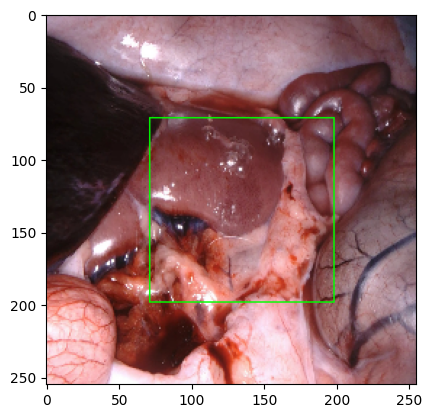

In [130]:
plt.imshow(immm)

In [122]:
'''
函数描述：对给定的图片和坐标信息在图片上标框，并在框的上方标注出该框的名称
函数参数：img_file_path=图片的绝对路径，new_img_file_path=保存后的绝对路径，points=[(str,[b0,b1,b2,b3])]
返回值：无返回值
注意事项：坐标[b0,b1,b2,b3]依次为左上角和右下角的坐标
'''

def draw_rectangle_by_point(image,new_img_file_path,points):
    for item in points:
        print("当前字符：",item)
        point=item[1]
        first_point=(int(135-127/2),int(135-127/2))
        last_point=(int(135-127/2),int(135-127/2))

        # first_point = (point[0] * 2, point[1] * 2)
        # last_point = (point[2]* 2, point[3] * 2)
        print("左上角：",first_point)
        print("右下角：",last_point)
        cv2.rectangle(image, first_point, last_point, (0, 255, 0), 1)#在图片上进行绘制框
        #cv2.putText(image, item[0], first_point, cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5, color=(255,0,0), thickness=1)#在矩形框上方绘制该框的名称
    return image



In [120]:
points = [[int(135-127/2), int(135+127/2), int(135+127/2), int(135-127/2)]]

In [123]:
imm = draw_rectangle_by_point(img,"new.jpg",points)

当前字符： [71, 198, 198, 71]
左上角： (71, 71)
右下角： (71, 71)


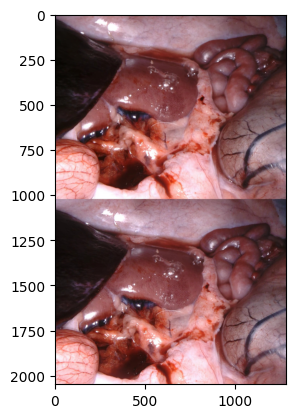

In [124]:
plt.imshow(imm)

In [ ]:
if __name__ == '__main__':
    #points=[('8F.', [66.72106971740723, 193.4539794921875, 80.52160511016845, 207.30389404296875]), ('Zhongshan', [241.5278513590495, 193.4539794921875, 282.9294575373332, 207.30389404296875])]
    points=[('No. 18', [89.72196203867594, 193.4539794921875, 117.3230328241984, 207.30389404296875]), 
            ('Zhongshan Dist.', [241.5278513590495, 193.4539794921875, 310.5305283228556, 207.30389404296875])]
    draw_rectangle_by_point(r'E:\wm_workspace\day2_2_24\images\16.pdf.png',"new.jpg",points)


In [ ]:
draw_rectangle_by_point(img,)